In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import  accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

C:\Users\IBK\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
advert = pd.read_csv("Advertising.csv")

In [3]:
advert.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [4]:
advert1 = advert.copy()

In [5]:
advert1 = advert1.drop(["Unnamed: 0"], axis=1)
advert1.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [6]:
advert1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
advert1.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [8]:
advert1.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

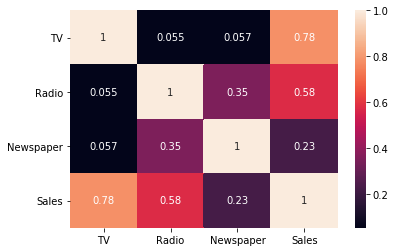

In [10]:
sns.heatmap(advert1.corr(), annot= True)

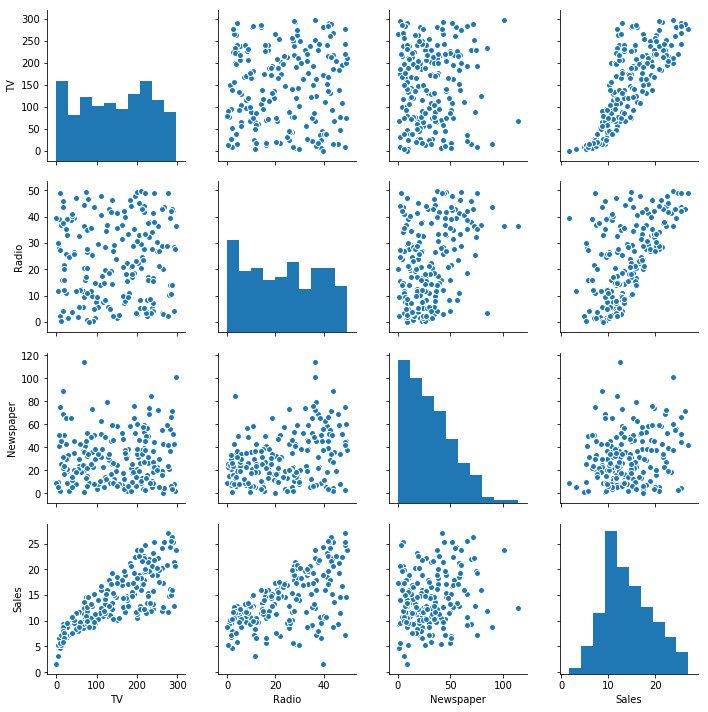

In [11]:
sns.pairplot(advert1)

In [12]:
# Splitting X and Y
y = advert1["Sales"]
X = advert1.drop(["Sales"], axis=1)

### Comparing with differnet model

### Linear Regression

In [13]:
#null Hypthesis
lr = LinearRegression(normalize= True) # this normalises the data

In [14]:
# using cross validation with k fold equals 10 #note your cross val returns a mse, then take the sqrt to get the rmse
rmse = np.sqrt(-cross_val_score(lr, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

1.7492763126843385

## Using Regularization

In [15]:
#Using 
lasso = Lasso(alpha=0.01, normalize= True)
rmse2 = np.sqrt(-cross_val_score(lasso, X, y,scoring= "neg_mean_squared_error", cv=10).mean())

In [16]:
rmse2

1.7454164272668475

### Using SVM

In [21]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [18]:
svr = SVR()
rmse = np.sqrt(-cross_val_score(svr, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

5.317359292844381

### Using Decision tree regressor

In [19]:
dt = DecisionTreeRegressor()
rmse = np.sqrt(-cross_val_score(dt, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

1.093046202134201

### Using Random Forest Regressor

In [20]:
rf = RandomForestRegressor()
rmse = np.sqrt(-cross_val_score(rf, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

0.8226673082115274

### Using Gradient Boosting Regressor

In [22]:
gb = GradientBoostingRegressor()
rmse = np.sqrt(-cross_val_score(gb, X, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

0.7186109194597182

### Normalising the dataset

In [23]:
#Normalsing your dataset
Xnew = X
min_max = MinMaxScaler()
Xnew = min_max.fit_transform(Xnew)

In [24]:
# using cross validation with k fold equals 10 #note your cross val returns a mse, then take the sqrt to get the rmse
rmse = np.sqrt(-cross_val_score(lr, Xnew, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse

1.749276312684338

In [26]:
#Using Lasso
lasso = Lasso(alpha=0.01, normalize= True)
rmse2 = np.sqrt(-cross_val_score(lasso, Xnew, y,scoring= "neg_mean_squared_error", cv=10).mean())
rmse2

1.7454164272668475